In [1]:
# !pip install matplotlib

In [2]:
%matplotlib inline

In [3]:
import xpress as xp

In [4]:
import pandas as pd
import numpy as np
import os

In [9]:
charg_point_path = os.path.join('Project_data/Charging_points.xlsx')
charg_point_df = pd.read_excel(charg_point_path)

demand_path = os.path.join('Project_data/Demand_data.xlsx')
demand_df = pd.read_excel(demand_path)

# points of interest in each grid
interest_point_path = os.path.join('Project_data/Interest _points.xlsx')
interest_point_df = pd.read_excel(interest_point_path)

amenity1 = set(interest_point_df['amenity'])

# potential charging points
pt_charg_point_path = os.path.join('Project_data/Potential_charging_points.xlsx')
pt_charg_point_df = pd.read_excel(pt_charg_point_path)

amenity2 = set(interest_point_df['amenity'])

In [10]:
## DEFINE
number_of_grids = 434
number_of_years = 4
grids = range(number_of_grids)
years = range(number_of_years)

# the demand every slow/ fast/ rapid chargers can satisfy
slow_c = [2000, 3500]
fast_c = [4000, 5200]
rapid_c = [30000, 50500]

In [11]:
## for visualizations
print(charg_point_df.columns)
charg_point_index = charg_point_df['grid number'].to_numpy()
print(charg_point_index)
print(max(charg_point_index))

Index(['CP ID', 'Type', 'geometry', 'Latitude', 'Longitude', 'grid number'], dtype='object')
[146  76 304 304 214 134 314 214 199 199 147 263 199 129 186 216 216 216
 216 216 300 216 216 216 216 216 345 369 369 301 300 274 263 259 288 205
 205 150 163  76 117 117  59  91 103 144 190 189 159 189 189 189 189 189
 190 189 160 160 160 173 173 228 228 228 214 214 214 199 200 200 200 200
 200 200 200 200 202 185]
369


## Plot the map with the existing charging and potantial charging points

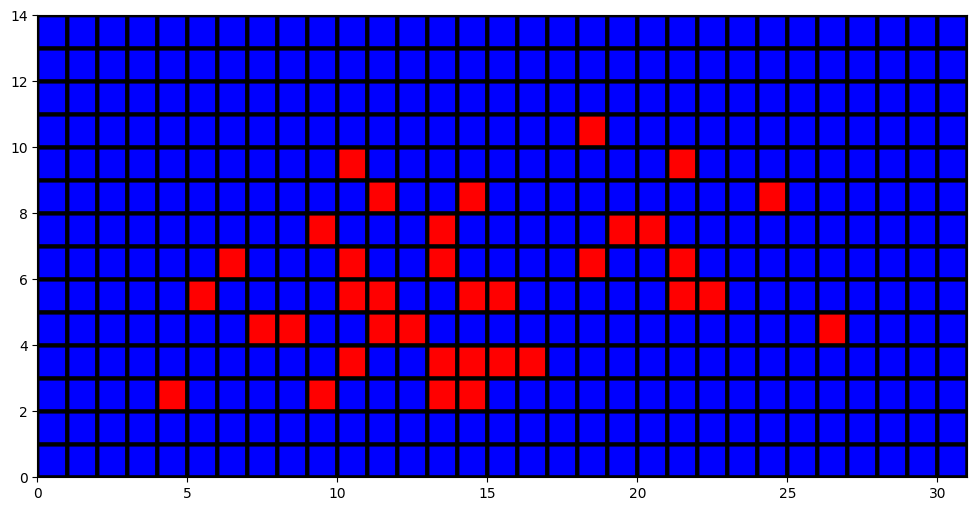

In [12]:
map_T = np.zeros((31, 14))
for num in charg_point_index:
    num = num-1
    x = num//14
    y = num %14
    map_T[x , y] = 1

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

cmap = colors.ListedColormap(['Blue','red'])
plt.figure(figsize=(12,6))
plt.pcolor(map_T.T,cmap=cmap,edgecolors='k', linewidths=3)
plt.show()

In [13]:
## for visualizations
print(interest_point_df.columns)
interest_point_index = interest_point_df['grid number'].to_numpy()
print(interest_point_index)
print(max(interest_point_index))

Index(['amenity', 'geometry', 'Latitude', 'Longitude', 'grid number'], dtype='object')
[400 398 369 369 369 369 369 369 355 214 214 214 214 214 200 199 200 134
 228 214 147 214 214 214 185 369 369  76 214 186 199 199 228 399 214 214
 199 214 214 214 214 200 230 171 200 217 369 369 214 228 200 214 214 214
 199 171 214 199 199 143 229 213 185 119 119 215 215 229 290 290 200 355
 185 228 185 214 213 214 214 371 356 300 243 300 245 175 143 305 329 160
 150 171 230 216 234 202 119 160 117 315 274 214 214 215 199 176 176 383
 200 214 176 151 314 200 161 344 399 247 229 170 172  91 205 146 230 397
 355 150 192 150 356 175 104 191 272 164 103 162 214  91 134 193 193 164
 215 304 290 273 287 262 189]
400


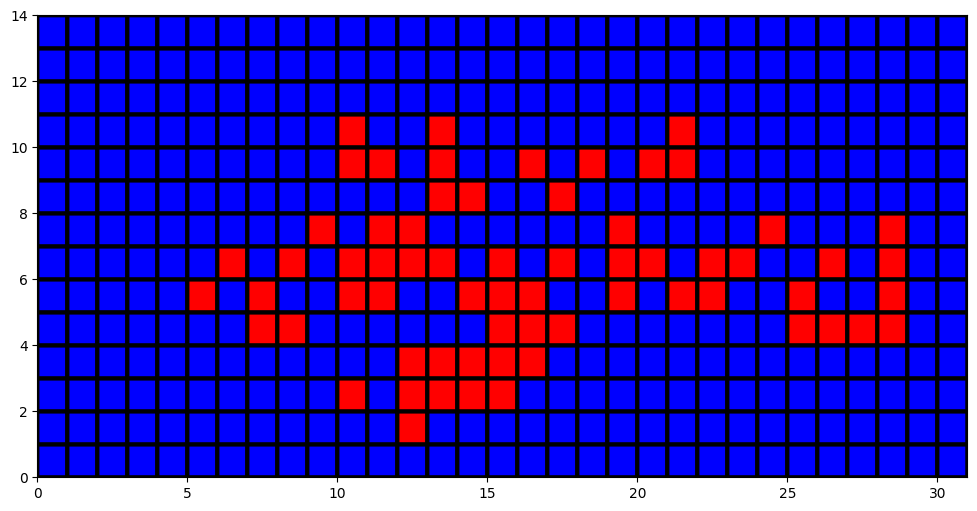

In [14]:
map_T = np.zeros((31, 14))
for num in interest_point_index:
    num = num-1
    x = num//14
    y = num %14
    map_T[x , y] = 1

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

cmap = colors.ListedColormap(['Blue','red'])
plt.figure(figsize=(12,6))
plt.pcolor(map_T.T,cmap=cmap,edgecolors='k', linewidths=3)
plt.show()

In [15]:
## for visualizations
print(pt_charg_point_df.columns)
pt_charg_point_index = pt_charg_point_df['grid number'].to_numpy()
print(pt_charg_point_index)
print(max(pt_charg_point_index))

Index(['amenity', 'geometry', 'Latitude', 'Longitude', 'grid number'], dtype='object')
[ 89 412 328 228 200 198 176 102 145 299 214 248 171 191 200 186 214 200
 116 116 228 228  88  88 228 369 369 399 400 199 214 215 214 200 184 215
 107 106 107 107 121 123 109 121  88 188 145 199 242 213 117 117 103 229
 228 229 115 129 176 176 176 176 176 200 200 199 200 213 214 382 199 199
 199 355 228 201 176 215 215 185 185 129 213 117 103 103 103 117 103 103
 103 199 203 216 199 156 129 184 198 228 229 228 228 200 200 200 247 233
 247 217 217 249 234 345 331 345 291 101 213 199 199 213 199 199 233 176
 176 400 400 214 185 199 397 185 146 342 356 355 355 369 355 228 327  90
 200 369 185 149 134 157 187 189 104 369 369 191  90 286 272 328 343 147
  89 213 202 202 201 246 215 177 103 230 230 202 144  91 115 115 171 161
 160 161 161  61  61 185 355 205 171 171 200 162 229 316 316 103 103 116
 116 116 102  89 143 102 213 146 146 192 192 200 200 200 200 214 187 200
 186 186 186 186 186 186 186 186 186 

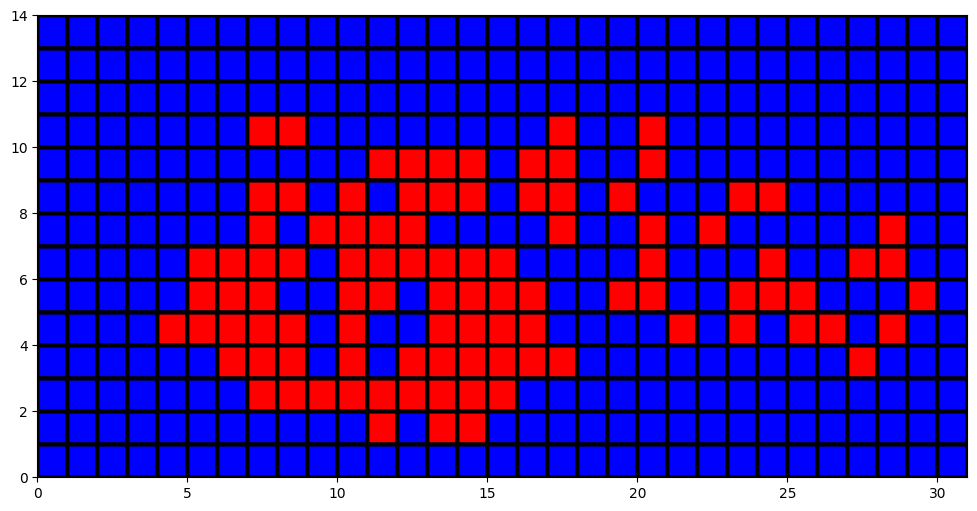

In [16]:
map_T = np.zeros((31, 14))
for num in pt_charg_point_index:
    num = num-1
    x = num//14
    y = num %14
    map_T[x , y] = 1

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

cmap = colors.ListedColormap(['Blue','red'])
plt.figure(figsize=(12,6))
plt.pcolor(map_T.T,cmap=cmap,edgecolors='k', linewidths=3)
plt.show()

In [140]:
## potential_list >= intereset_list
## existing_list ?
# pt_charg_point_index, interest_point_index, charg_point_index

## Lets see if the point of interest is in the potential charging points list
## if so, then we can easily put charging point there aka. place of interest
## if not, we find a point in the neighboring area that is in the potential charging point list
## also we should consider energy efficiency at this point/ points
construct = {}
neighbor = demand_df['NEIGHBORS'].to_numpy()
neighbor = [np.array(ne[1:-1].replace(' ', '').split(','), dtype = int) for ne in neighbor]

for k in interest_point_index:
    if k in pt_charg_point_index:
        construct[k] = [k]
#     if k not in pt_charg_point_index:
    else:
        construct[k] = []
        neighboring_area = neighbor[k-1]
        for nei in neighboring_area:
            if nei in pt_charg_point_index:
                construct[k].append(nei)

print(construct)

{400: [400], 398: [385, 397, 399, 412], 369: [369], 355: [355], 214: [214], 200: [200], 199: [199], 134: [134], 228: [228], 147: [147], 185: [185], 76: [76], 186: [186], 399: [399], 230: [230], 171: [171], 217: [217], 143: [143], 229: [229], 213: [213], 119: [119], 215: [215], 290: [290], 371: [356, 385], 356: [356], 300: [286, 287, 299], 243: [228, 229, 230, 242], 245: [230, 246], 175: [175], 305: [290, 291], 329: [316, 328, 342, 343], 160: [160], 150: [149, 164], 216: [216], 234: [234], 202: [202], 117: [117], 315: [316, 328], 274: [275, 287, 288], 176: [176], 383: [369, 382, 397], 151: [164], 314: [299, 327, 328], 161: [161], 344: [331, 343, 345], 247: [247], 170: [156, 157, 171, 184, 185], 172: [172], 91: [91], 205: [205], 146: [146], 397: [397], 192: [192], 104: [104], 191: [191], 272: [272], 164: [164], 103: [103], 162: [162], 193: [178, 192, 206], 304: [290, 291], 273: [272, 286, 287, 288], 287: [287], 262: [247, 248, 249, 275], 189: [189]}


In [18]:
interest_point_index, pt_charg_point_index

(array([400, 398, 369, 369, 369, 369, 369, 369, 355, 214, 214, 214, 214,
        214, 200, 199, 200, 134, 228, 214, 147, 214, 214, 214, 185, 369,
        369,  76, 214, 186, 199, 199, 228, 399, 214, 214, 199, 214, 214,
        214, 214, 200, 230, 171, 200, 217, 369, 369, 214, 228, 200, 214,
        214, 214, 199, 171, 214, 199, 199, 143, 229, 213, 185, 119, 119,
        215, 215, 229, 290, 290, 200, 355, 185, 228, 185, 214, 213, 214,
        214, 371, 356, 300, 243, 300, 245, 175, 143, 305, 329, 160, 150,
        171, 230, 216, 234, 202, 119, 160, 117, 315, 274, 214, 214, 215,
        199, 176, 176, 383, 200, 214, 176, 151, 314, 200, 161, 344, 399,
        247, 229, 170, 172,  91, 205, 146, 230, 397, 355, 150, 192, 150,
        356, 175, 104, 191, 272, 164, 103, 162, 214,  91, 134, 193, 193,
        164, 215, 304, 290, 273, 287, 262, 189]),
 array([ 89, 412, 328, 228, 200, 198, 176, 102, 145, 299, 214, 248, 171,
        191, 200, 186, 214, 200, 116, 116, 228, 228,  88,  88, 228, 369,
 

In [19]:
neighbor = demand_df['NEIGHBORS'].to_numpy()
# type(neighbor)
k = np.array(neighbor[1][1:-1].replace(' ', '').split(','), dtype = int)

# [ne for ne in neighbor]

In [20]:
k[0],k[1], k[2], k[3], k[4]

(1, 3, 15, 16, 17)

In [21]:
interest_point_df.loc[interest_point_df['grid number'] == 369]

,amenity,geometry,Latitude,Longitude,grid number
2,restaurant,POINT (-2.872495786961546 56.46693379999114),56.466934,-2.872496,369
3,restaurant,POINT (-2.873346686962511 56.46599179999032),56.465992,-2.873347,369
4,restaurant,POINT (-2.873426086962618 56.46584759999016),56.465848,-2.873426,369
5,restaurant,POINT (-2.874470586962676 56.46826679999267),56.468267,-2.874471,369
6,restaurant,POINT (-2.87337658696255 56.46593739999025),56.465937,-2.873377,369
7,restaurant,POINT (-2.872903486961812 56.46709969999133),56.467100,-2.872904,369
25,restaurant,POINT (-2.876396586964792 56.46635079999101),56.466351,-2.876397,369
26,supermarket,POINT (-2.872844486961724 56.46723309999146),56.467233,-2.872844,369
46,restaurant,POINT (-2.876109586964176 56.46758839999217),56.467588,-2.876110,369
47,restaurant,POINT (-2.876080086964137 56.46764029999223),56.467640,-2.876080,369


In [22]:
interest_point_df.loc[interest_point_df['grid number'] == 398]

,amenity,geometry,Latitude,Longitude,grid number
1,restaurant,POINT (-2.849993386942502 56.47134889999293),56.471349,-2.849993,398


In [26]:
d0 = demand_df['Demand_0'].to_numpy()
d1 = demand_df['Demand_1'].to_numpy()
d2 = demand_df['Demand_2'].to_numpy()
d3 = demand_df['Demand_3'].to_numpy()
len(d0), max(d0),len(d1), max(d1),len(d2), max(d2),len(d3), max(d3)

(434, 71461.761, 434, 71461.761, 434, 76229.77392179765, 434, 93064.4145271874)

In [23]:
## lets use the demand table pandas dataframe here:
demand_df.columns

Index(['Ref', 'geometry', 'Number of Charging Points',
       'Number of Slow Charging Points', 'Number of Fast Charging Points',
       'Number of Rapid Charging Points', 'Number of PoI',
       'Number of Potential Locations', 'Distance from Centre', 'NEIGHBORS',
       'Demand_0', 'Demand_1', 'Demand_2', 'Demand_3'],
      dtype='object')

In [66]:
# neighbor = demand_df['NEIGHBORS'].to_numpy()
# neighbor = [np.array(ne[1:-1].replace(' ', '').split(','), dtype = int) for ne in neighbor]

num_potential = demand_df['Number of Potential Locations'].to_numpy()
num_interest = demand_df['Number of PoI'].to_numpy()

# construct = {}

In [27]:
##suppose the 

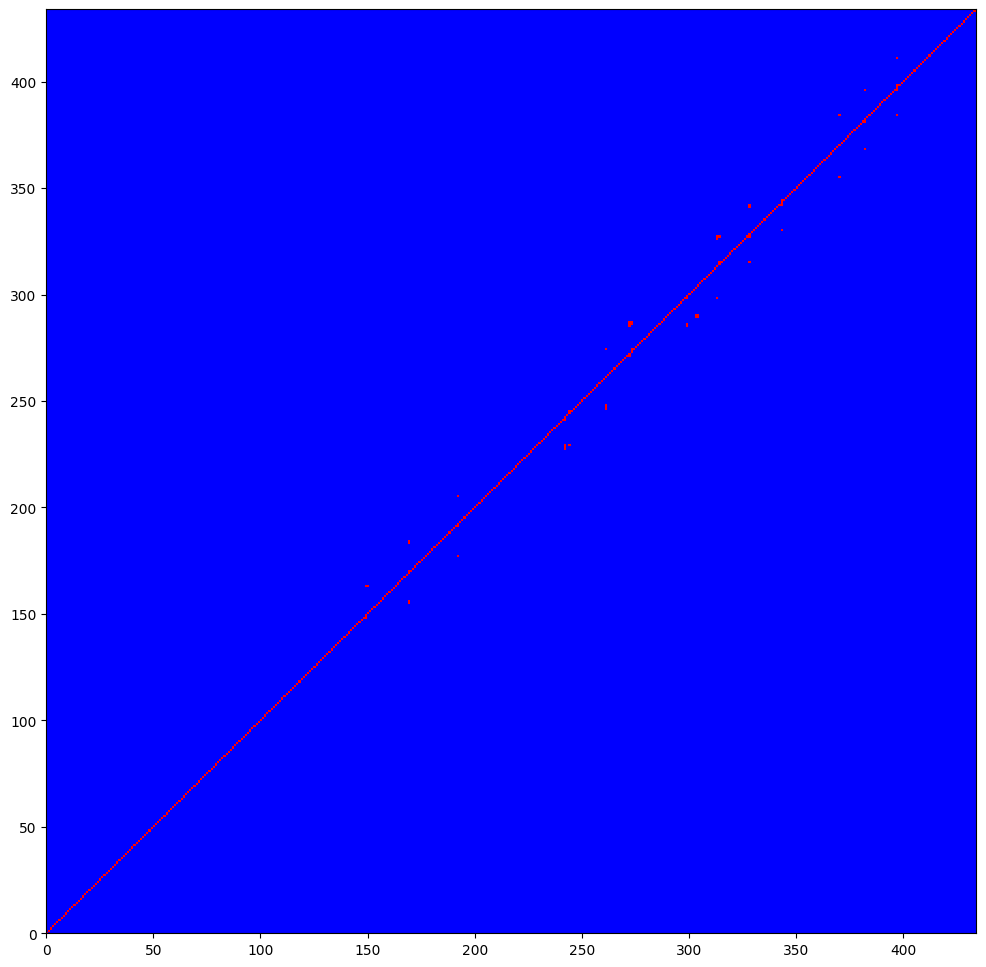

In [32]:

##enlarge construct so that include itself along with its neighbors
for i in range(number_of_grids):
    ii = i+1
    if ii not in construct.keys():
        construct[ii] = [ii]
    else:
        construct[ii].append(ii)

# print(construct)

# here A is a matrix 434*434 denoting at each index if the other relevant index is neighbor(1) or not(0)
# A is a binary matrix
A = np.zeros((number_of_grids, number_of_grids))  # A is a 343x343 matrix
for i in range(number_of_grids):
    for j in range(number_of_grids):
        if (i+1) in construct[j+1]:
            A[i,j] = 1
            
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

# cmap = colors.ListedColormap(['Blue','red'])
plt.figure(figsize=(12,12))
plt.pcolor(A,cmap=cmap)
plt.show()

In [33]:
len(A)

434

In [44]:
list(A[0]).index(1)

0

In [46]:
construct.keys()

dict_keys([400, 398, 369, 355, 214, 200, 199, 134, 228, 147, 185, 76, 186, 399, 230, 171, 217, 143, 229, 213, 119, 215, 290, 371, 356, 300, 243, 245, 175, 305, 329, 160, 150, 216, 234, 202, 117, 315, 274, 176, 383, 151, 314, 161, 344, 247, 170, 172, 91, 205, 146, 397, 192, 104, 191, 272, 164, 103, 162, 193, 304, 273, 287, 262, 189])

In [93]:
construct[193]

[178, 192, 206]

In [111]:
construct[215]

[215]

In [55]:
a = np.array([1,0,1, -1])
a

array([ 1,  0,  1, -1])

In [56]:
a[a< 0] = 0
a

array([1, 0, 1, 0])

In [85]:
qq = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 6.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 11.0, 3.0, 2.0, 1.0, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 5.0, 4.0, 0.0, 5.0, 0.0, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 5.0, 1.0, 1.0, 1.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 4.0, 3.0, 0.0, 0.0, 6.0, 9.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 7.0, 15.0, 4.0, 2.0, 1.0, 0.0, 3.0, 3.0, -0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 13.0, 18.0, 3.0, 3.0, 2.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 9.0, 5.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 5.0, 6.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.0, 0.0, -0.0, 2.0, 4.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.0, -0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 7.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, -0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

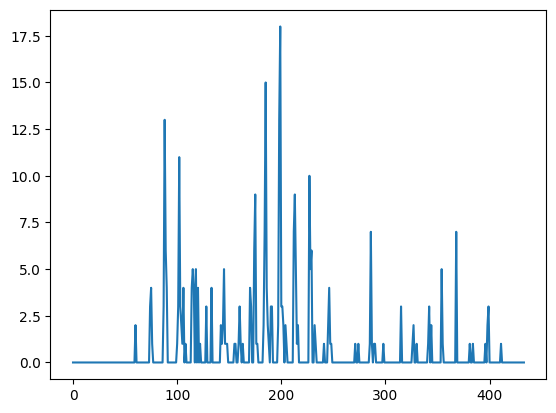

In [86]:
plt.plot(qq)

In [87]:
qq = np.array(qq, dtype = int)
np.max(qq), np.argmax(qq)

(18, 199)

In [88]:
sum(num_potential)

324

In [89]:
np.sum(qq)

324

In [135]:
sol1 = [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 5.0, 5.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 7.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
sol1 = np.array(sol1, dtype = int)
np.max(sol1), np.argmax(sol1), np.sum(sol1)

(7, 368, 20)

In [139]:
## EXAMPLE
construct[262]

[247, 248, 249, 275]

In [141]:
arr = construct[262]
arr = [q-1 for q in arr]
arr, sol1[arr]

([246, 247, 248, 274], array([0, 0, 0, 0]))

In [142]:
# xp.Dot(A, x)[90] x(90)
construct[91]

[91]

In [146]:
434-38, construct[397]

(396, [397])

In [147]:
construct[398]

[385, 397, 399, 412]

In [151]:
sol2 = [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 5.0, 5.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 7.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
sol2 = np.array(sol2, dtype = int)
np.max(sol2), np.argmax(sol2), np.sum(sol2), sum(sol1 == sol2)

(7, 368, 20, 434)

In [165]:
sol3 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 6.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 1.0, 1.0, 2.0, 1.0, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 5.0, -0.0, 0.0, 3.0, 0.0, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, -0.0, -0.0, 1.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 1.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 2.0, 3.0, 1.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 4.0, 1.0, 4.0, 2.0, -0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 5.0, -0.0, 3.0, 1.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 25.0, 4.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 2.0, 3.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 1.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 1.0, -0.0, 0.0, 3.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 1.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

sol3 = np.array(sol3, dtype = int)
np.max(sol3), np.argmax(sol3), np.sum(sol3)

(25, 213, 182)

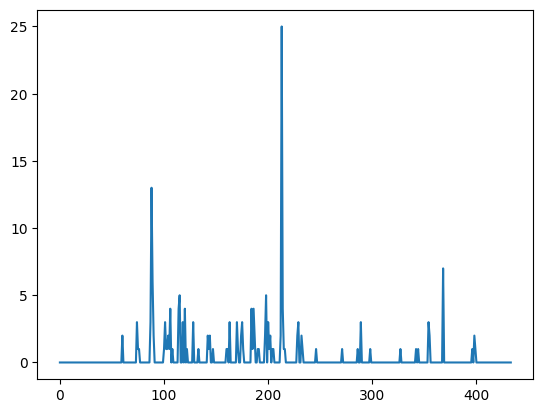

In [166]:
plt.plot(sol3)

In [167]:
construct[262]

[247, 248, 249, 275]

In [168]:
sol3[246], sol3[247], sol3[248], sol3[274]

(1, 0, 0, 0)

In [169]:
sol3[261]

0